if we want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path. Then the solution is to use multiple input

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
california_housing= fetch_california_housing(as_frame=True)

In [4]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
california_housing.frame.shape[1:]

(9,)

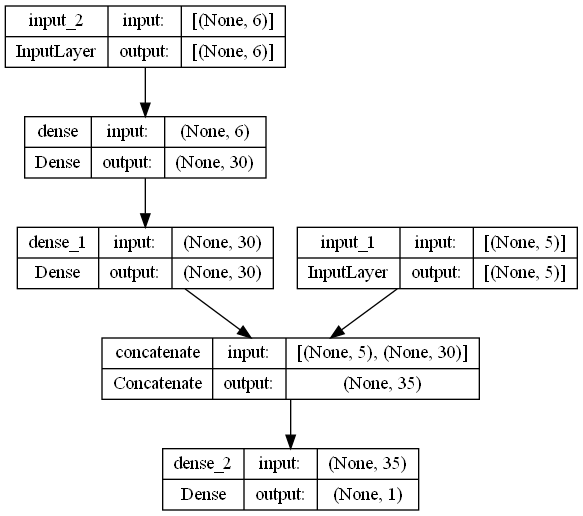

In [7]:
from tensorflow import keras
input_A=keras.layers.Input(shape=[5])
input_B=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_A,input_B],outputs=[output])
keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [9]:
model.compile(loss="mse",optimizer="adam",metrics=['accuracy'])

# preprocessing datasets to train the model

In [10]:
x_train_full,x_test, y_train_full, y_test=train_test_split(california_housing.data,california_housing.target)

In [11]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [12]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_valid_scaled=scaler.fit_transform(x_valid)
x_test_scaled=scaler.transform(x_test)

In [13]:
x_train_A,x_train_B=x_train.iloc[:, :5],x_train.iloc[:, 2:]
x_valid_A,x_valid_B=x_valid.iloc[:,:5],x_valid.iloc[:,2:]
x_test_A,x_test_B=x_test.iloc[:,:5],x_test.iloc[:,2:]
x_new_A,x_new_B=x_test_A.iloc[:3],x_test_B.iloc[:3]

In [14]:
history=model.fit((x_train_A,x_train_B),y_train,epochs=10,validation_data=((x_valid_A,x_valid_B),y_valid),batch_size=16)

Epoch 1/10
726/726 [==============================] - 2s 2ms/step - loss: 6820.7217 - accuracy: 0.0016 - val_loss: 20.4362 - val_accuracy: 0.0013
Epoch 2/10
726/726 [==============================] - 1s 1ms/step - loss: 19.4085 - accuracy: 0.0016 - val_loss: 17.6237 - val_accuracy: 0.0013
Epoch 3/10
726/726 [==============================] - 1s 1ms/step - loss: 15.3872 - accuracy: 0.0015 - val_loss: 13.1109 - val_accuracy: 0.0013
Epoch 4/10
726/726 [==============================] - 1s 1ms/step - loss: 11.0283 - accuracy: 0.0016 - val_loss: 11.4333 - val_accuracy: 0.0013
Epoch 5/10
726/726 [==============================] - 1s 1ms/step - loss: 6.7164 - accuracy: 0.0016 - val_loss: 4.9858 - val_accuracy: 0.0013
Epoch 6/10
726/726 [==============================] - 1s 1ms/step - loss: 3.7810 - accuracy: 0.0016 - val_loss: 2.6522 - val_accuracy: 0.0018
Epoch 7/10
726/726 [==============================] - 1s 1ms/step - loss: 2.2939 - accuracy: 0.0019 - val_loss: 1.7013 - val_accuracy: 0.0

In [15]:
mse_test=model.evaluate((x_test_A,x_test_B),y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.9946 - accuracy: 0.0035


In [16]:
y_pred=model.predict((x_new_A,x_new_B))

1/1 [==============================] - 0s 108ms/step


In [17]:
y_test[:3]

16662    2.470
4693     4.869
18204    3.642
Name: MedHouseVal, dtype: float64

In [18]:
y_pred

array([[1.3221254],
       [2.7014055],
       [1.3626986]], dtype=float32)

In [19]:
import pandas as pd

NameError: name 'plt' is not defined

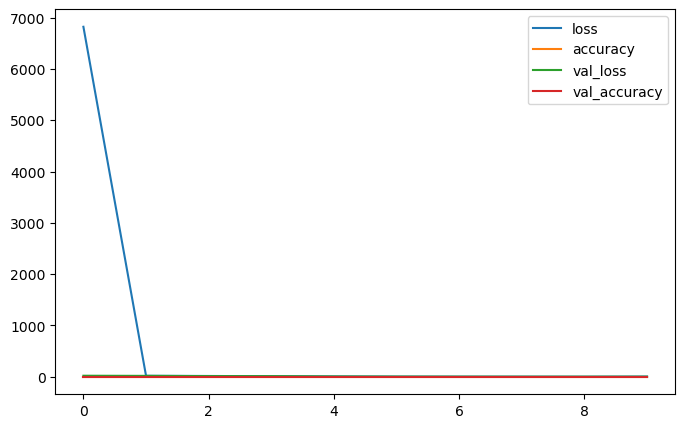

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()